## Crime against Women - Data Analysis

In [86]:
import os
import pandas as pd
import numpy as np

In [87]:
crimes_df = pd.read_csv('./crimes_against_women_2001-2014.csv')
crimes_df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [88]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


### Columns containing any null or missing values

In [89]:
overall_crime = crimes_df.isna().sum()

In [90]:
overall_crime

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

### Total number of unique districts where crimes have been commited

In [91]:
no_of_districts = len(crimes_df.DISTRICT.unique())
no_of_districts

1605

### Since there are only 718 districts in India, it means that the data is messy and there are huge amount of false values in the dataset

### Hence we should drop 'Districts' and 'Unnamed' columns

In [92]:
crimes_df.drop(['DISTRICT', 'Unnamed: 0'], axis=1, inplace=True)
crimes_df

,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


In [93]:
crimes_df.rename(columns = {
    'Kidnapping and Abduction':'Kidnapping_Abduction',
    'Dowry Deaths': 'Dowry_Deaths',
    'Assault on women with intent to outrage her modesty': 'Hurting_of_womens_modesty',
    'Insult to modesty of Women': 'Insult_to_womens_modesty',
    'Cruelty by Husband or his Relatives': 'Domestic_Cruelty',
    'Importation of Girls':'Importation_of_Girls'
}, inplace = True)
crimes_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


### Analysing the datas of the column "STATE/UT"

In [94]:
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [95]:
crimes_df['STATE/UT'].str.strip().str.upper()

0        ANDHRA PRADESH
1        ANDHRA PRADESH
2        ANDHRA PRADESH
3        ANDHRA PRADESH
4        ANDHRA PRADESH
              ...      
10672       LAKSHADWEEP
10673       LAKSHADWEEP
10674        PUDUCHERRY
10675        PUDUCHERRY
10676        PUDUCHERRY
Name: STATE/UT, Length: 10677, dtype: object

In [96]:
crimes_df['STATE/UT'] = crimes_df['STATE/UT'].str.strip().str.upper()

In [97]:
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'A&N ISLANDS',
       'D&N HAVELI', 'DELHI UT', 'TELANGANA'], dtype=object)

In [98]:
crimes_df['STATE/UT'].replace('D&N HAVELI', 'D & N HAVELI',inplace=True)
crimes_df['STATE/UT'].replace('A&N ISLANDS', 'A & N ISLANDS',inplace=True)
crimes_df['STATE/UT'].replace('DELHI UT', 'DELHI',inplace=True)

In [99]:
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

In [100]:
len(crimes_df['STATE/UT'].unique())

36

### Total population of women over the years, 2001-2014, who has been a victim of the crime based on their gender.

In [101]:
crimes_df.columns

Index(['STATE/UT', 'Year', 'Rape', 'Kidnapping_Abduction', 'Dowry_Deaths',
       'Hurting_of_womens_modesty', 'Insult_to_womens_modesty',
       'Domestic_Cruelty', 'Importation_of_Girls'],
      dtype='object')

In [102]:
total_population_of_victims = crimes_df.iloc[: ,2:].sum().sum()
total_population_of_victims

5321610

### More than 5 million females have been a victim of rape, violence, assault and even death

### Analyzing all the cases using bar graph

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Cases ofImportation of girls in India')

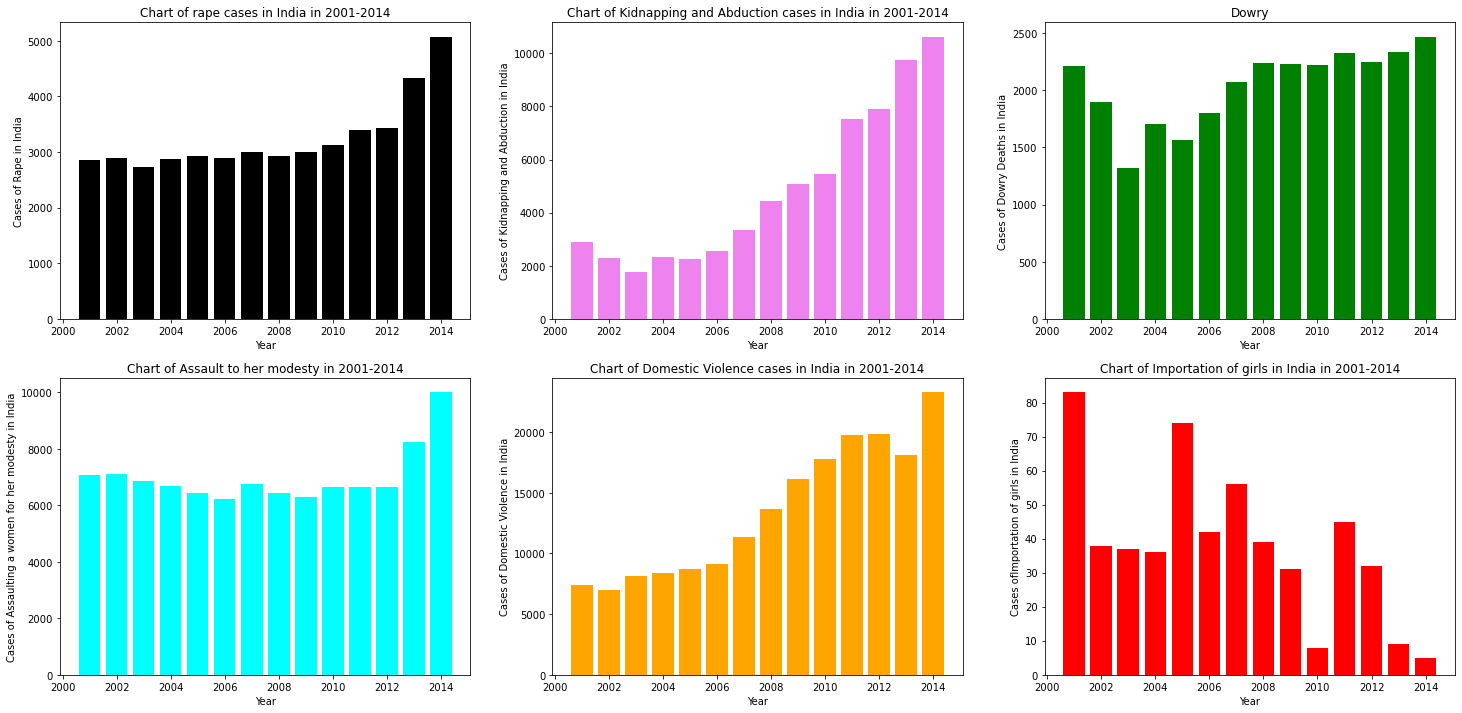

In [104]:
#Insert code for bar graph
fig, axes =plt.subplots(2,3, figsize=(25,12))

axes[0,0].set_title("Chart of rape cases in India in 2001-2014")
axes[0,0].bar(crimes_df.Year, crimes_df.Rape, color = 'black');
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Cases of Rape in India')

axes[0,1].set_title("Chart of Kidnapping and Abduction cases in India in 2001-2014")
axes[0,1].bar(crimes_df.Year, crimes_df.Kidnapping_Abduction, color = 'violet');
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Cases of Kidnapping and Abduction in India')

axes[0,2].set_title('Dowry')
axes[0,2].bar(crimes_df.Year, crimes_df.Dowry_Deaths, color='green')
axes[0,2].set_xlabel('Year')
axes[0,2].set_ylabel('Cases of Dowry Deaths in India')

axes[1,0].set_title("Chart of Assault to her modesty in 2001-2014")
axes[1,0].bar(crimes_df.Year, crimes_df.Hurting_of_womens_modesty, color = 'cyan');
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Cases of Assaulting a women for her modesty in India')

axes[1,1].set_title("Chart of Domestic Violence cases in India in 2001-2014")
axes[1,1].bar(crimes_df.Year, crimes_df.Domestic_Cruelty, color = 'orange');
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Cases of Domestic Violence in India')

axes[1,2].set_title("Chart of Importation of girls in India in 2001-2014")
axes[1,2].bar(crimes_df.Year, crimes_df.Importation_of_Girls, color = 'red');
axes[1,2].set_xlabel('Year')
axes[1,2].set_ylabel('Cases ofImportation of girls in India')

### There are two things to be concluded from the above bar chart -
1) The cases have increased over the years.

2) 2014 has been the year, where violance against women was reported the maximum, under each of the cases like, rape, domestic violence etc, which can also be proved below, which can also be cross examined with the code below.

In [105]:
count_df = crimes_df.groupby('Year')[['STATE/UT']].count()
count_df

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


### Heatmap which represents cases from each state in each passing year

<AxesSubplot:title={'center':'Total cases reported from every state Year wise'}, ylabel='Year'>

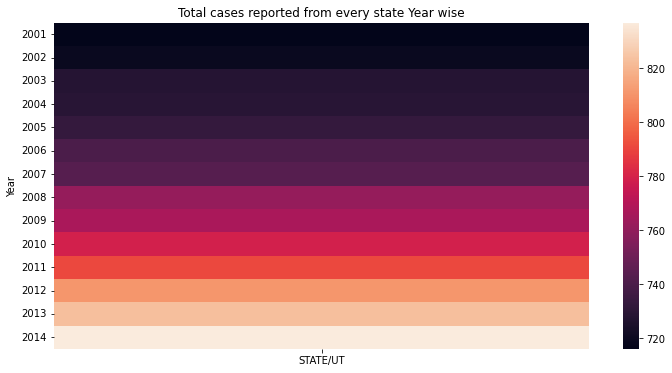

In [106]:
#Insert code for heatmap
plt.figure(figsize=(12,6))
plt.title('Total cases reported from every state Year wise')
sns.heatmap(count_df)

## Finding out answers to some of the most essential questions

In [107]:
crimes_df = crimes_df.drop(['Hurting_of_womens_modesty','Insult_to_womens_modesty'], axis=1)

### Q1. Create a dataframe containing 10 highest reported rape cases in India, in the span of year 2001-2014.

In [108]:
max_rape_cases = crimes_df.sort_values('Rape', ascending=False).head(10)
max_rape_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
10244,MADHYA PRADESH,2014,5076,5688,733,6451,0
9426,MADHYA PRADESH,2013,4335,2873,776,4988,7
10445,RAJASTHAN,2014,3759,4421,408,15905,0
10595,UTTAR PRADESH,2014,3467,10626,2469,10471,0
10291,MAHARASHTRA,2014,3438,2457,279,7696,1
8611,MADHYA PRADESH,2012,3425,1127,743,3988,6
7810,MADHYA PRADESH,2011,3406,1088,811,3732,45
9628,RAJASTHAN,2013,3285,4047,453,15094,1
7025,MADHYA PRADESH,2010,3135,1030,892,3756,5
9472,MAHARASHTRA,2013,3063,1874,320,8542,0


### The state where there are maximum rape cases is Madhya Pradesh in the year 2014 

### Q2. Create a dataframe containing 10 highest reported deaths caused by Dowry cases in India, in the span of year 2001-2014.

In [109]:
max_dowry_deaths = crimes_df.sort_values('Dowry_Deaths',ascending=False).head(10)
max_dowry_deaths

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
10595,UTTAR PRADESH,2014,3467,10626,2469,10471,0
9760,UTTAR PRADESH,2013,3050,9737,2335,8781,0
8132,UTTAR PRADESH,2011,2042,7525,2322,7121,0
8938,UTTAR PRADESH,2012,1963,7910,2244,7661,0
5796,UTTAR PRADESH,2008,1871,4439,2237,8312,0
6563,UTTAR PRADESH,2009,1759,5078,2232,8566,0
7342,UTTAR PRADESH,2010,1563,5468,2217,7978,0
650,UTTAR PRADESH,2001,1958,2879,2211,7365,0
5040,UTTAR PRADESH,2007,1648,3363,2076,7650,0
1366,UTTAR PRADESH,2002,1415,2298,1893,5679,0


### The only state in the list for the maximum deaths by dowry from 2001 - 2014 is Uttar Pradesh

### Q3. Create a dataframe containing 10 highest reported Domestic Violence cases in India, in the span of year 2001-2014.

In [110]:
max_domestic_violence = crimes_df.sort_values('Domestic_Cruelty', ascending=False).head(10)
max_domestic_violence

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
10640,WEST BENGAL,2014,1466,4976,501,23278,4
8982,WEST BENGAL,2012,2046,4168,593,19865,12
8172,WEST BENGAL,2011,2363,3711,510,19772,0
9804,WEST BENGAL,2013,1685,3830,481,18116,9
7381,WEST BENGAL,2010,2311,2764,507,17796,8
6602,WEST BENGAL,2009,2336,2187,506,16112,5
10445,RAJASTHAN,2014,3759,4421,408,15905,0
9628,RAJASTHAN,2013,3285,4047,453,15094,1
9050,ANDHRA PRADESH,2013,1635,1595,492,15084,0
5835,WEST BENGAL,2008,2263,1907,451,13663,5


### The maximum cases of Domestic Violence came from West Bengal from 2009 - 2014, where no. of cases in 2014 being the highest

### Q4. Find out the total number of cases, in span of 2001-2014 under each category, state wise.

In [111]:
total_cases_df = crimes_df.groupby('STATE/UT')[list(crimes_df.columns)[2:]].sum()
total_cases_df

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,
A & N ISLANDS,336,212,20,288,0
ANDHRA PRADESH,32150,34504,13844,280906,34
ARUNACHAL PRADESH,1316,1470,6,476,0
ASSAM,40190,62074,3268,115300,22
BIHAR,30758,57086,32206,69770,904
CHANDIGARH,770,1682,90,2080,0
CHHATTISGARH,29308,11808,2758,23436,12
D & N HAVELI,132,224,2,90,0
DAMAN & DIU,60,44,6,76,0


### Q5. Find out the top 10 states, where TOTAL number of cases that has been reported is highest in a span of 2001-2014

In [112]:
total_cases_state_wise = pd.DataFrame(total_cases_df.sum(axis=1).rename('total_no_of_cases'))
state_with_max_cases = total_cases_state_wise.sort_values('total_no_of_cases',ascending=False).head(10)
state_with_max_cases

,total_no_of_cases
STATE/UT,
WEST BENGAL,465720
UTTAR PRADESH,438056
RAJASTHAN,386030
ANDHRA PRADESH,361438
MAHARASHTRA,282246
MADHYA PRADESH,250644
ASSAM,220854
GUJARAT,193890
BIHAR,190724


### West Bengal has the highest total number of cases reported

### Q6. Which category of crime has maximum number of cases?

In [113]:
crimes = crimes_df.iloc[:,2:].sum()
crimes[[crimes.idxmax()]]

Domestic_Cruelty    2233888
dtype: int64

### Domestic Violence against women has the highest number of reported cases

### Q7. Which state has featured in both the lists of "Maximum number of rape cases" and "Maximum number of Deaths due to Dowry cases".

In [114]:
max_rape_dowry_cases = max_dowry_deaths.merge(max_rape_cases)
max_rape_dowry_cases

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
0,UTTAR PRADESH,2014,3467,10626,2469,10471,0


### Uttar Pradesh has reported maximum cases in both the given categories.

### Saving revised dataset

In [116]:
crimes_df.to_csv('crimes_against_woman_revised.csv', encoding='utf-8', index=False)